In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler

from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [2]:
df_full_r = os.path.join(os.getcwd(), "member_type_prediction_full_record.csv")
df_5_r = os.path.join(os.getcwd(), "member_type_prediction_5record.csv")

In [3]:
df = pd.read_csv(df_5_r)

In [4]:
df.head()

,member_id,member_age,member_gender,member_total_distance,member_period,wd_ratio,usage_per_week,interval_mean,interval_med,interval_std,...,car_type_gini,zone_gini,trip_gini,attraction_mean,attraction_std,restaurant_mean,restaurant_std,shopping_mean,shopping_std,member_type
0,1,35,male,8774.0,1425,0.8,0.115894,8.223958,8.854167,5.366304,...,0.32,0.56,0.906667,0.428380,0.398057,19.438700,3.798821,1.208576,0.590071,0
1,10,26,male,9550.0,755,0.6,0.117057,33.994792,30.024306,14.787664,...,0.56,0.56,0.736111,0.237014,0.299347,11.824094,0.914811,1.121910,0.201928,3
2,13,40,male,7105.0,586,1.0,0.115512,27.708333,26.326389,10.186635,...,0.64,0.32,0.760331,0.617962,0.737226,15.569857,3.524970,1.535372,0.537232,1
3,15,38,male,1881.0,2235,0.6,0.117450,22.281250,24.645833,8.905775,...,0.32,0.56,0.641975,0.121984,0.055053,12.989093,1.141449,1.011056,0.136639,1
4,22,21,male,5734.0,435,0.4,0.116667,38.510417,28.440972,26.973121,...,0.00,0.64,0.871111,0.701803,0.623375,22.212247,4.153058,1.840245,0.906086,2


In [5]:
df.columns

Index(['member_id', 'member_age', 'member_gender', 'member_total_distance',
       'member_period', 'wd_ratio', 'usage_per_week', 'interval_mean',
       'interval_med', 'interval_std', 'usage_time_mean', 'usage_time_std',
       'usage_time_med', 'vroom_per_usage', 'num_trips_mean', 'num_trips_std',
       'car_type_mode', 'car_type_gini', 'zone_gini', 'trip_gini',
       'attraction_mean', 'attraction_std', 'restaurant_mean',
       'restaurant_std', 'shopping_mean', 'shopping_std', 'member_type'],
      dtype='object')

In [6]:
df['member_gender'] = df['member_gender'].replace(['male', 'female'], [0,1])

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['car_type_mode'])
df['car_type_mode'] = le.transform(df['car_type_mode'])

In [8]:
X = df.iloc[:,1:-1] #feature
y = df.iloc[:,-1] #target

In [9]:
col = ['member_age', 'member_total_distance', 'member_period', 'wd_ratio', 'usage_per_week', 'interval_mean',
       'interval_med', 'interval_std', 'usage_time_mean', 'usage_time_std', 'usage_time_med', 'vroom_per_usage',
       'num_trips_mean', 'num_trips_std', 'car_type_gini', 'zone_gini', 'trip_gini', 'attraction_mean', 
       'attraction_std', 'restaurant_mean', 'restaurant_std', 'shopping_mean', 'shopping_std']

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#  standard scaler적용
scaler_option = 'ss'
if scaler_option == 'ss':
    scaler = StandardScaler()
elif scaler_option == 'mms':
    scaler = MinMaxScaler()

scaled_X = X.copy()
scaled_X[col] = scaler.fit_transform(scaled_X[col])

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, stratify=y.to_numpy())
y_train.value_counts()

2    3155
3    2875
1    2860
0    1991
Name: member_type, dtype: int64

In [11]:
y_test.value_counts()

2    789
3    719
1    715
0    498
Name: member_type, dtype: int64

In [12]:
# imbalanced data 오버 샘플링 처리
x_resampled, y_resampled = SMOTE(random_state=0).fit_resample(x_train, y_train)
y_resampled.value_counts()

1    3155
3    3155
2    3155
0    3155
Name: member_type, dtype: int64

In [13]:
model_X = x_resampled.copy()
model_y = y_resampled.copy()

### LogisticRegression

In [35]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
             'penalty' : ["l1","l2"]
             }
#모델 파라미터 조정(규제 파라미터 및 반복 학습 횟수)
lr = LogisticRegression(random_state=10)
grid_search = GridSearchCV(lr, param_grid=param_grid, cv=2)
grid_search.fit(model_X, model_y)


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

GridSearchCV(cv=2, estimator=LogisticRegression(random_state=10),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [36]:
print('Best Parameter: {}'.format(grid_search.best_params_))
print('Best Score: {:.4f}'.format(grid_search.best_score_))
print('Test Score: {:.4f}'.format(grid_search.score(x_test, y_test)))

Best Parameter: {'C': 1, 'penalty': 'l2'}
Best Score: 0.8851
Test Score: 0.8780


In [40]:
from sklearn.metrics import classification_report

pred_y = grid_search.best_estimator_.predict(x_test)

cfreport_test = classification_report(y_test, pred_y)
print(cfreport_test)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       498
           1       0.91      0.90      0.91       715
           2       0.88      0.87      0.88       789
           3       0.86      0.85      0.86       719

    accuracy                           0.88      2721
   macro avg       0.88      0.88      0.88      2721
weighted avg       0.88      0.88      0.88      2721



### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier


param_grid = {'max_depth' : [10,11,12,13, 14, 15, 16],
             'min_samples_leaf' : [3,4,5,6,7,8,9,10,11]
             }
dt_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(dt_clf, param_grid=param_grid, cv=2)
grid_search.fit(model_X, model_y)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10, 11]})

정확도 : 0.582139, 정밀도 : 0.581805, 재현율 : 0.580340
f1-score : 0.577156


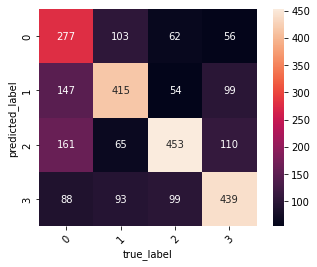

In [14]:
#################
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=12, min_samples_leaf=5)
dt_clf.fit(model_X, model_y)

from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix, roc_auc_score
final_model = dt_clf
final_pred = final_model.predict(x_test)

def metric(y_test, pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1 = f1_score(y_test,pred, average='macro')
    print('정확도 : {0:.6f}, 정밀도 : {1:.6f}, 재현율 : {2:.6f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.6f}'.format(f1))

metric(y_test, final_pred)

# confusion matrix 확인하기


con_mat = confusion_matrix(y_test, final_pred)
sns.heatmap(con_mat, square=True, annot=True, fmt='d')
plt.xlabel('true_label')
plt.ylabel('predicted_label')
plt.xticks(rotation=45)
plt.show()

#################

In [16]:
print('Best Parameter: {}'.format(grid_search.best_params_))
print('Best Score: {:.4f}'.format(grid_search.best_score_))
print('Test Score: {:.4f}'.format(grid_search.score(x_test, y_test)))

Best Parameter: {'max_depth': 10, 'min_samples_leaf': 11}
Best Score: 0.6067
Test Score: 0.5994


In [47]:
pred_y = grid_search.best_estimator_.predict(x_test)

cfreport_test = classification_report(y_test, pred_y)
print(cfreport_test)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       498
           1       0.90      0.90      0.90       715
           2       0.91      0.87      0.89       789
           3       0.87      0.88      0.88       719

    accuracy                           0.89      2721
   macro avg       0.88      0.89      0.88      2721
weighted avg       0.89      0.89      0.89      2721



### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
              'n_estimators': range(100, 1000, 100),
              'max_depth': [10, 15, 25, 30],
              'min_samples_split' : [5, 10, 15,20],
              'bootstrap':[True, False]
              }

rf_clf = RandomForestClassifier(random_state=10)
grid_search = GridSearchCV(rf_clf, param_grid=param_grid, cv=2)
grid_search.fit(model_X, model_y)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=10),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 15, 25, 30],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': range(100, 1000, 100)})

In [56]:
print('Best Parameter: {}'.format(grid_search.best_params_))
print('Best Score: {:.4f}'.format(grid_search.best_score_))
print('Test Score: {:.4f}'.format(grid_search.score(x_test, y_test)))

Best Parameter: {'bootstrap': False, 'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 800}
Best Score: 0.9151
Test Score: 0.9247


In [57]:
pred_y = grid_search.best_estimator_.predict(x_test)

cfreport_test = classification_report(y_test, pred_y)
print(cfreport_test)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       498
           1       0.93      0.94      0.94       715
           2       0.93      0.93      0.93       789
           3       0.91      0.93      0.92       719

    accuracy                           0.92      2721
   macro avg       0.92      0.92      0.92      2721
weighted avg       0.92      0.92      0.92      2721



### Xgboost

In [58]:
from xgboost import XGBClassifier

param_grid = {
              'n_estimators': [400,450],
              'max_depth':[8,10],
              'min_child_weight':[5,8],
              'nthread':[8],
              'colsample_bytree':[0.8,0.9],
              'objective':['multi:softmax']
              }

xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=2)
grid_search.fit(model_X, model_y)

E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:07:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:07:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:07:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:08:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:08:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:08:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:08:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:08:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:08:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:08:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:08:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:09:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:09:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:09:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:09:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:09:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:09:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:10:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:10:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:10:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:10:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:10:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:10:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:10:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:10:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:10:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:11:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:11:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [59]:
print('Best Parameter: {}'.format(grid_search.best_params_))
print('Best Score: {:.4f}'.format(grid_search.best_score_))
print('Test Score: {:.4f}'.format(grid_search.score(x_test, y_test)))

Best Parameter: {'colsample_bytree': 0.9, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 450, 'nthread': 8, 'objective': 'multi:softmax'}
Best Score: 0.9431
Test Score: 0.9460


In [60]:
pred_y = grid_search.best_estimator_.predict(x_test)

cfreport_test = classification_report(y_test, pred_y)
print(cfreport_test)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       498
           1       0.95      0.96      0.95       715
           2       0.95      0.96      0.96       789
           3       0.93      0.94      0.94       719

    accuracy                           0.95      2721
   macro avg       0.95      0.94      0.94      2721
weighted avg       0.95      0.95      0.95      2721



### Ensemble Voting

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [18]:
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(random_state=10, C=1, penalty='l2')
dt_clf = DecisionTreeClassifier(max_depth=12, min_samples_leaf=5)
rf_clf = RandomForestClassifier(random_state=10, bootstrap=False, max_depth=25, min_samples_split=5, n_estimators=800)
xgb = XGBClassifier(colsample_bytree=0.9, max_depth=8, min_child_weight=5, n_estimators=450, nthread=8, objective='multi:softmax')
voting_hard = VotingClassifier(
                estimators = [('lr', lr), ('dt', dt_clf), ('rf', rf_clf), ('xgb', xgb)], voting='hard')
voting_soft = VotingClassifier(
                estimators = [('lr', lr), ('dt', dt_clf), ('rf', rf_clf), ('xgb', xgb)], voting='soft')
voting_hard.fit(model_X, model_y)
voting_soft.fit(model_X, model_y)

E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:05:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:07:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('lr', LogisticRegression(C=1, random_state=10)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=12,
                                                     min_samples_leaf=5)),
                             ('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=25,
                                                     min_samples_split=5,
                                                     n_estimators=800,
                                                     random_state=10)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            col...
                                            max_delta_s

In [34]:
from sklearn.metrics import accuracy_score

for clf in (lr, dt_clf, rf_clf, xgb, voting_hard, voting_soft):
    clf.fit(model_X, model_y)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.6391032708563028
DecisionTreeClassifier 0.5942668136714443
RandomForestClassifier 0.6486585814038957
[10:35:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier 0.6361631753031973


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
VotingClassifier 0.6449834619625138


E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Users\hong9\Anaconda3\envs\cv2_study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:38:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
VotingClassifier 0.6523337008452774


In [35]:
from sklearn.metrics import classification_report
pred_y = voting_hard.predict(x_test)

cfreport_test = classification_report(y_test, pred_y)
print(cfreport_test)

              precision    recall  f1-score   support

           0       0.50      0.52      0.51       498
           1       0.64      0.66      0.65       715
           2       0.72      0.71      0.71       789
           3       0.68      0.65      0.66       719

    accuracy                           0.64      2721
   macro avg       0.63      0.63      0.63      2721
weighted avg       0.65      0.64      0.65      2721



In [36]:
from sklearn.metrics import classification_report
pred_y = voting_soft.predict(x_test)

cfreport_test = classification_report(y_test, pred_y)
print(cfreport_test)

              precision    recall  f1-score   support

           0       0.53      0.48      0.50       498
           1       0.64      0.67      0.66       715
           2       0.72      0.72      0.72       789
           3       0.67      0.68      0.68       719

    accuracy                           0.65      2721
   macro avg       0.64      0.64      0.64      2721
weighted avg       0.65      0.65      0.65      2721



정확도 : 0.664462, 정밀도 : 0.653630, 재현율 : 0.653844
f1-score : 0.653494


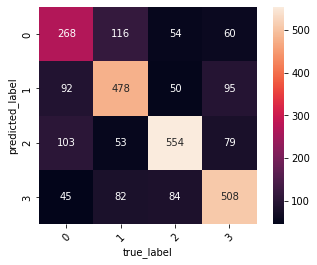

In [19]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix, roc_auc_score
final_model = voting_soft
final_pred = final_model.predict(x_test)

def metric(y_test, pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1 = f1_score(y_test,pred, average='macro')
    print('정확도 : {0:.6f}, 정밀도 : {1:.6f}, 재현율 : {2:.6f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.6f}'.format(f1))

metric(y_test, final_pred)

# confusion matrix 확인하기


con_mat = confusion_matrix(y_test, final_pred)
sns.heatmap(con_mat, square=True, annot=True, fmt='d')
plt.xlabel('true_label')
plt.ylabel('predicted_label')
plt.xticks(rotation=45)
plt.show()

In [71]:
from sklearn.metrics import roc_curve, auc

y_score = model.fit().decision_function(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

KeyError: 'key of type tuple not found and not a MultiIndex'

In [ ]:


# First aggregate all false positive rates
n_classes = y_train.to_numpy()

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_train.nunique())]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [47]:
df_pred = pd.DataFrame({'value' : y_test.to_numpy(), 'pred' : pred_y})

In [81]:
df_pred.loc[(df_pred['pred']==0) & (df_pred['value']!= df_pred['pred']), 'value'].value_counts()

1    104
2     74
3     38
Name: value, dtype: int64

In [82]:
df_pred.loc[(df_pred['pred']==0) & (df_pred['value']== df_pred['pred']), 'value'].value_counts()

0    239
Name: value, dtype: int64

In [77]:
df_pred.loc[(df_pred['pred']==0) & (df_pred['value']== df_pred['pred']), 'value'].value_counts()

0    239
Name: value, dtype: int64

In [ ]:
df_pred.loc[(df_pred['value']==0) & (df_pred['value']== df_pred['pred']), 'pred'].value_counts()

In [56]:
df_pred.loc[(df_pred['value']==1) & (df_pred['value']!= df_pred['pred']), 'pred'].value_counts()

0    104
3     92
2     39
Name: pred, dtype: int64

In [57]:
df_pred.loc[(df_pred['value']==2) & (df_pred['value']!= df_pred['pred']), 'pred'].value_counts()

3    90
0    74
1    59
Name: pred, dtype: int64

In [58]:
df_pred.loc[(df_pred['value']==3) & (df_pred['value']!= df_pred['pred']), 'pred'].value_counts()

2    96
1    95
0    38
Name: pred, dtype: int64

In [ ]:
###########

In [ ]:
lr = LogisticRegression(random_state=10, C=1, penalty='l2')
dt_clf = DecisionTreeClassifier(max_depth=12, min_samples_leaf=5)
rf_clf = RandomForestClassifier(random_state=10)

voting_hard = VotingClassifier(
                estimators = [('lr', lr), ('dt', dt_clf), ('rf', rf_clf)], voting='soft')
voting_hard.fit(model_X, model_y)

In [ ]:
for clf in (lr, dt_clf, rf_clf, voring_hard):
    clf.fit(model_X, model_y)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
pred_y = voting_hard.predict(x_test)

cfreport_test = classification_report(y_test, pred_y)
print(cfreport_test)

In [ ]:
features = model_X.columns
num_features = len(features)
def plot_feature_importances(model):
    plt.figure(figsize=(12,8))
    n_features = num_features
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(clf)

In [ ]:









# k_fold validation 적용 (연산이 오래 걸릴수도 있음)
# -> 연산이 너무 많이 걸리지 않는 선에서 최대 효율을 뽑을 필요가 있어보임
k_fold = KFold(random_state=50, n_splits=5, shuffle=True)

# 모델 설정
#model = RandomForestClassifier()
model = XGBClassifier()
#model = LGBMClassifier()

# 그리드 서치 파라미터 설정

# RandomForest 파라미터
'''
param_grid = {
              'n_estimators': [200, 250],
              'max_depth': [25,30],
              'min_samples_split' : [15,20],
              'bootstrap':['False','True'],
              'min_samples_leaf': [10,15],
              }
'''   

#XGBoost 파라미터
param_grid = {
              'n_estimators': [400,450],
              'max_depth':[8,10],
              'min_child_weight':[5,8], #min sample leaf
              'nthread':[8], #스레드 갯수 고정
              'colsample_bytree':[0.8,0.9], #max feature
              'objective':['multi:softmax']
              }


'''
#lightGBM 파라미터
param_grid = {
              'n_estimators': [200],
              'min_child_samples':[1,2], #과적합을 방지하는 파라미터
              'max_depth':[7,8,10],
              'num_leaves':[70],
              'sub_sample':[0.2,0.4] #과적합 방지하기 위해 데이터 샘플링 하는 비율
              }
'''

grid_search = GridSearchCV(estimator = model, 
                           param_grid = param_grid,
                           cv = k_fold)

grid_search.fit(x_resampled, y_resampled)
best_param = grid_search.best_params_

# 최적 파라미터와 결과
print(best_param)
print('best score : {}'.format(grid_search.best_score_))

# 최종 모델 평가
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix, roc_auc_score
final_model = grid_search.best_estimator_
final_pred = final_model.predict(x_test)

def metric(y_test, pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1 = f1_score(y_test,pred, average='macro')
    print('정확도 : {0:.6f}, 정밀도 : {1:.6f}, 재현율 : {2:.6f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.6f}'.format(f1))

metric(y_test, final_pred)

# confusion matrix 확인하기


con_mat = confusion_matrix(y_test, final_pred)
sns.heatmap(con_mat, square=True, annot=True, fmt='d')
plt.xlabel('true_label')
plt.ylabel('predicted_label')
plt.xticks(rotation=45)
plt.show()

# 특성 중요도 추출하기
diction= {}
for name, score in zip(df.columns, final_model.feature_importances_):
    #print(name, score)
    diction[name]=score
    
feature_importance = pd.DataFrame(list(diction.items()), columns=['features', 'score'])

plt.figure(figsize=(10, 8))
sns.barplot(x='features', y='score', data=feature_importance)
plt.title('Feature Importances', fontsize=15)
plt.show()
